In [1]:
#load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
import gc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Using TensorFlow backend.


In [2]:
#setting the working directory
os.chdir("G:\Edwiser material\Project\Santandarcustomer problems\Edwiser project")

In [3]:
#check for the set directroy
os.getcwd()

'G:\\Edwiser material\\Project\\Santandarcustomer problems\\Edwiser project'

In [4]:
#Loading the required data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
#deleting the ID_code varibale which is nothing but string and no information
del train["ID_code"]
del test["ID_code"]

In [7]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


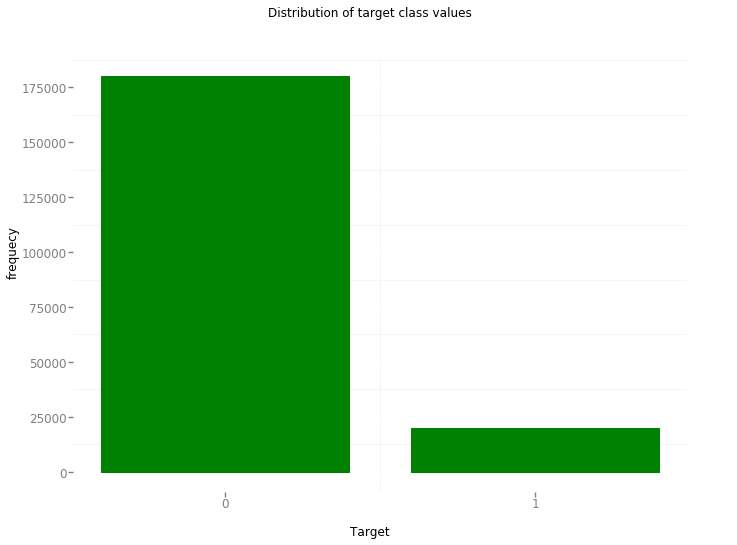

<ggplot: (-9223371895554713360)>

In [8]:
#plotting a barplot for count of target classes
ggplot(train, aes(x='target'))+\
    geom_bar(fill="Green")+\
    scale_color_brewer(type='diverging', palette=2)+\
    xlab('Target')+ylab('frequecy')+ggtitle("Distribution of target class values")+ theme_bw()

In [9]:
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 200 entries, var_0 to var_199
dtypes: float64(200)
memory usage: 305.2 MB


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [15]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [16]:
#make a list of columns of the train data
cnames=list(train.columns)

In [17]:
cnames.remove('target')

In [18]:
cnames

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

Distributions columns


12

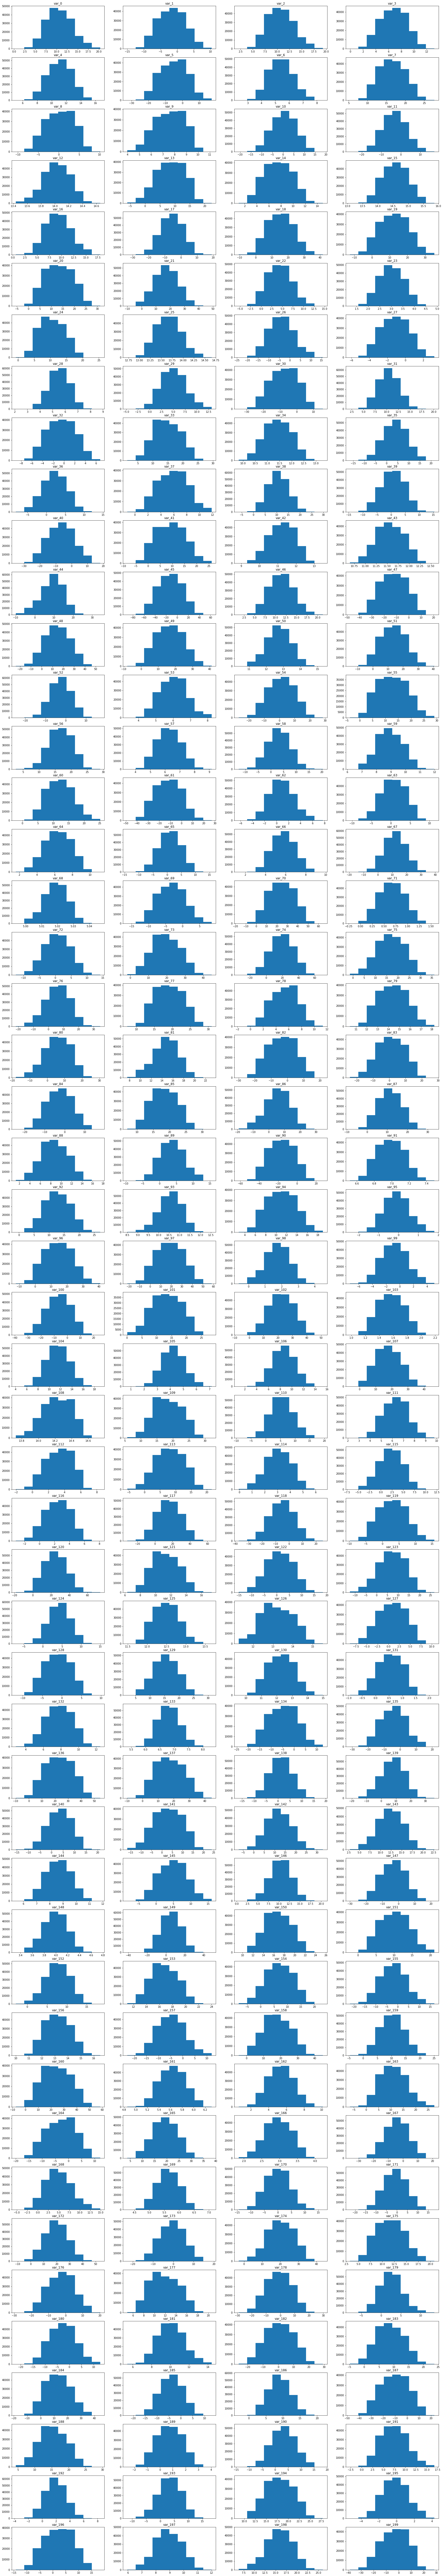

In [19]:
# plot for the distribution of all the values of the columns
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(cnames):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[col]) 
    plt.title(col)
gc.collect()
#plt.savefig('hist.png')

Distributions columns


4

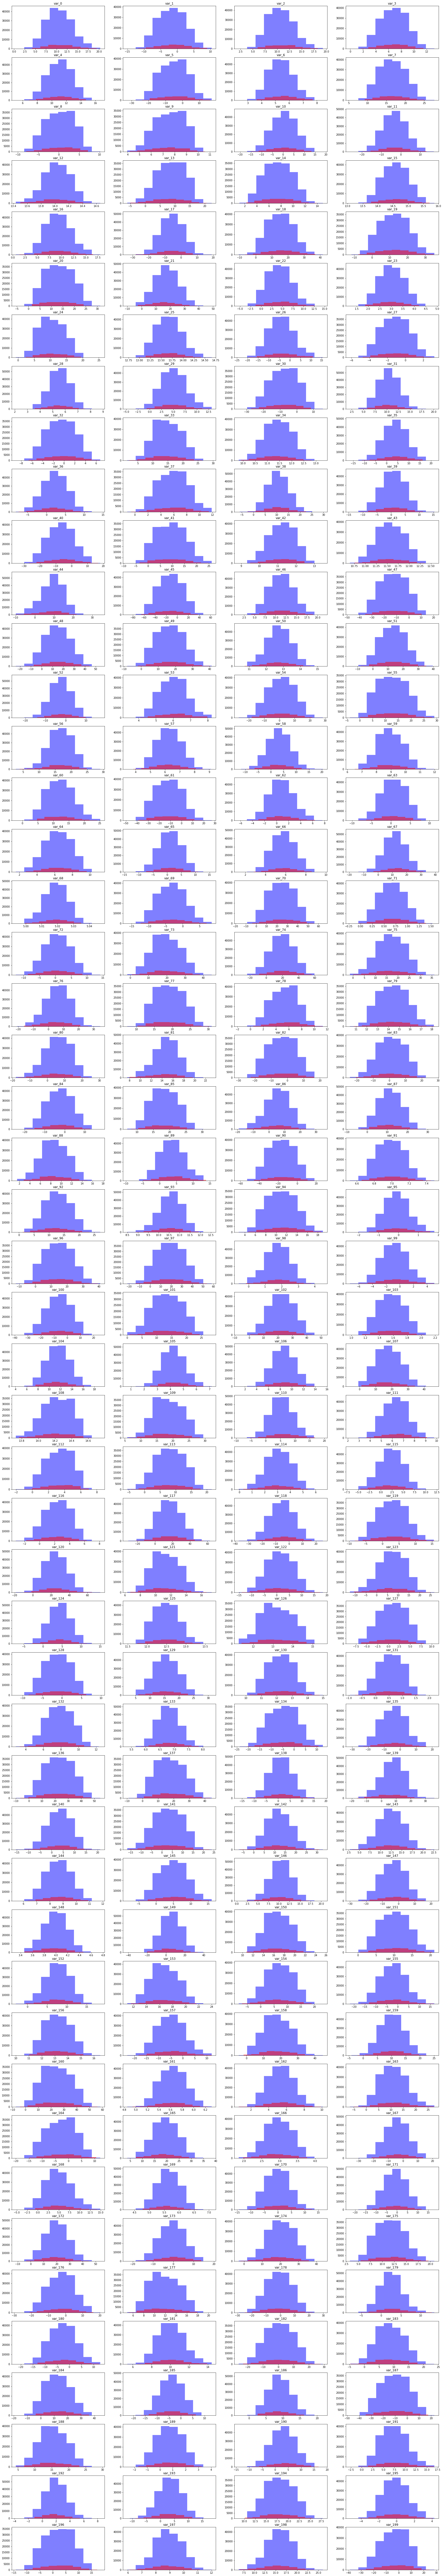

In [20]:
# distribution of all the values with respect to target class
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(cnames):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train[train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect()
#plt.savefig('hist.png')

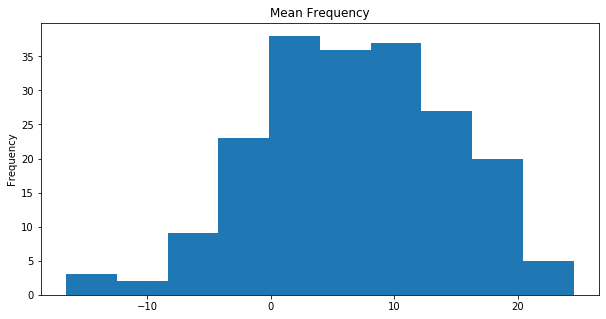

In [21]:
#plot for the frequency of mean
plt.figure(figsize=(10, 5))
train[cnames].mean().plot(kind='hist');
plt.title('Mean Frequency');

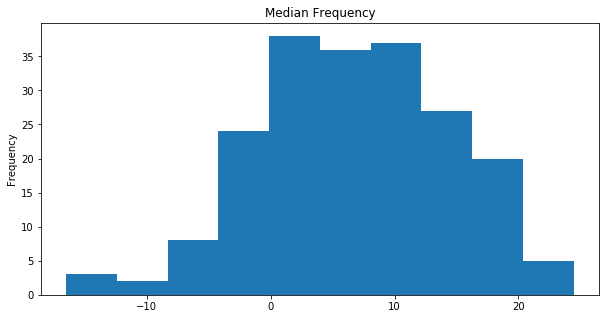

In [22]:
#plot for the frequency of Median
plt.figure(figsize=(10, 5))
train[cnames].median().plot(kind='hist');
plt.title('Median Frequency');

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


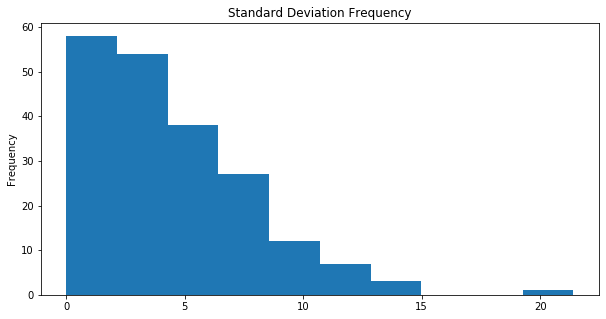

In [23]:
#Plot for frequency of standard deviation
plt.figure(figsize=(10, 5))
train[cnames].std().plot('hist');
plt.title('Standard Deviation Frequency');

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


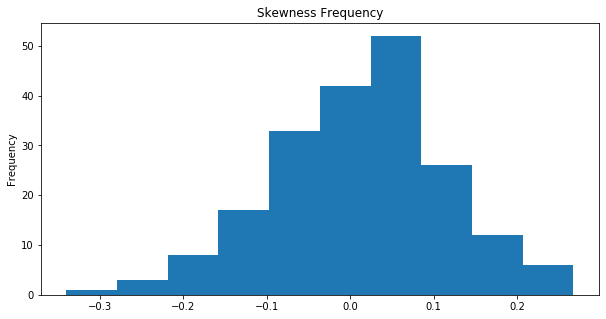

In [24]:
#plot for the frequency of Skewness
plt.figure(figsize=(10, 5))
train[cnames].skew().plot('hist');
plt.title('Skewness Frequency');

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


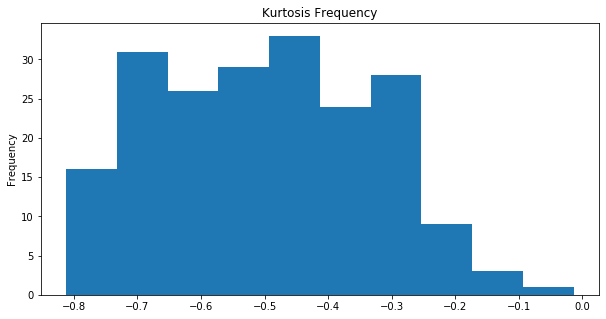

In [25]:
#plot for the frequency of kurtosis
plt.figure(figsize=(10, 5))
train[cnames].kurt().plot('hist');
plt.title('Kurtosis Frequency');

# # Missing Value Analysis

In [26]:
#creating data frame with missing values in train data
Missing_val_train=pd.DataFrame(train.isnull().sum())

In [27]:
#createting data frmae with missing values present in test data
Missing_val_test=pd.DataFrame(test.isnull().sum())

In [28]:
Missing_val_train.transpose()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
Missing_val_test.transpose()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Selection

## Correlation anlysis

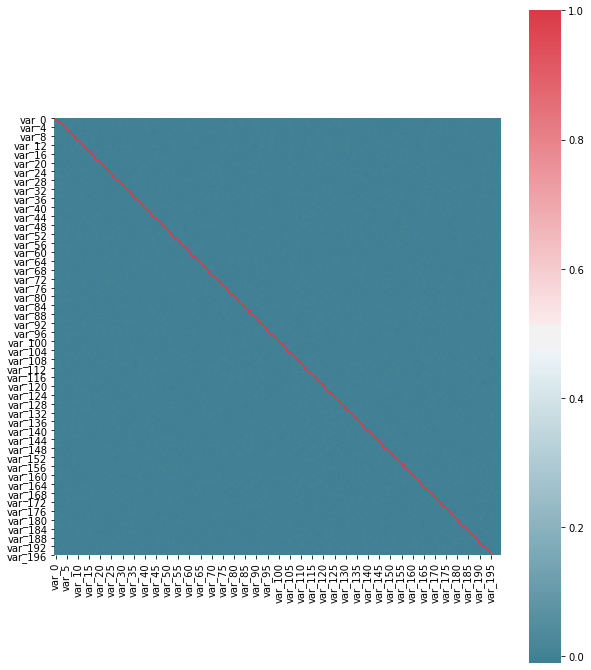

In [30]:
#Correlation plot
df_corr=train.loc[:,cnames]

#set the width and height of the plot
f, ax=plt.subplots(figsize=(10,12))

#generate correlation matrix
corr=df_corr.corr()

#plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax)
#plt.savefig('cor.png')

# Feature Scaling

In [31]:
#standardization
#for i in cnames:
#    #print(i)
#    train[i]=(train[i]-train[i].mean())/train[i].std()

In [32]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
    # save confusion matrix and slice into four pieces    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]    
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    #claculate false negative rate
    conf_FNR = (FN/ float(FN + TN))
    
    #calculate false positive rate
    conf_FPR = (FP/ float(FP + TP)) 
    
    #calculating sensitivity
    conf_sensitivity = (TP / float(TP + FN))    
    
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))    
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))    
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'FNR: {round(conf_FNR,2)}')
    print(f'FPR: {round(conf_FPR,2)}')
    print(f'Sensitivity/TPR/Recall: {round(conf_sensitivity,2)}') 
    print(f'Specificity/TNR: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

# Sampling

In [33]:
#divide data into train and test using simple random sampling
Sample_Index=np.random.rand(len(train))< 0.75
trainLR=train[Sample_Index]
testLR=train[~Sample_Index]

In [34]:
trainLR.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [35]:
testLR.shape

(50218, 201)

In [36]:
testLR.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
23,0,15.0029,-9.3439,10.3790,8.3226,13.0204,-5.0744,5.2489,11.6845,2.4277,6.6768,2.0868,-9.4632,14.3968,12.5111,7.7081,14.8456,8.5766,-7.6960,19.8976,-3.1722,18.0553,14.3083,5.5099,2.0598,7.0412,14.0052,-4.3154,-2.1271,5.6619,7.6321,-11.6791,10.0586,1.9295,11.7083,11.3347,8.1002,1.0926,2.8859,16.5117,-2.6108,-12.9188,14.7471,11.3345,11.0977,-2.8268,1.1825,7.9644,-5.9012,17.1602,16.5408,12.5357,6.7626,-2.1447,7.1474,9.2970,15.5215,22.2373,6.6918,6.3489,8.8051,6.7888,-20.6608,-2.6766,3.4519,6.7753,-0.3032,6.4501,8.0438,5.0361,-8.5015,28.8194,0.7230,1.5304,16.1325,33.1933,12.9214,-10.7618,13.5658,3.8978,13.4338,1.6025,14.1861,-4.5135,7.6487,-14.9462,15.5990,3.4743,7.0072,6.3790,2.6248,-15.2546,6.8774,7.8386,11.6642,11.7089,0.5974,27.2254,27.0748,2.4004,-2.4148,5.9957,8.7720,17.7856,1.3541,13.4390,4.2936,9.2990,33.8517,14.3651,19.9673,3.4192,6.7075,6.1870,5.8585,3.4183,0.1468,3.7045,13.4518,-0.5549,4.0976,48.2364,11.4948,3.9699,12.7552,3.5322,12.2333,12.8312,1.0404,1.9237,21.0149,12.2851,0.6530,6.8515,6.1327,3.0198,8.5609,7.4903,23.9090,-1.7358,14.1019,-0.3418,11.5410,18.4513,11.5421,8.7533,5.1792,8.5956,-2.9159,3.7651,33.8777,16.3428,6.6993,9.0158,14.2613,9.8877,4.7311,12.1630,-10.6462,0.4560,11.0850,22.1278,5.5400,8.3310,5.1103,-13.1325,12.0692,3.1893,2.4344,8.7091,5.2437,7.6946,-5.4696,11.8359,1.4648,20.2965,14.0290,1.2707,12.4714,2.7273,1.4241,-7.6439,10.4344,0.9704,14.2971,7.4818,-3.0058,7.4867,-3.9635,16.3380,1.2293,2.9210,4.3916,5.2208,1.3458,18.2940,2.3865,-3.7144,9.4714,12.8480,-10.0357
25,0,8.2703,-5.6854,12.6862,7.2755,12.3713,-7.7521,6.7252,18.4270,-2.7730,7.7828,1.5081,-8.7697,14.0772,12.6567,6.7688,14.5918,11.2201,-16.3697,16.4329,3.6179,13.8754,18.3706,0.3181,3.6256,19.4572,14.2413,-8.2744,-0.7037,6.1583,4.7122,-9.6458,13.7031,-0.2717,11.4563,11.0292,0.5531,4.1614,7.8508,14.4380,0.9415,-2.7614,16.3307,10.4648,11.4890,1.5365,-24.2338,5.8118,-25.0897,34.8745,24.7346,13.2789,-0.9286,-10.0202,6.1115,-4.6037,14.1028,20.9582,6.6239,-1.5082,8.5871,18.6043,-18.7857,2.6112,-1.3172,4.0681,-4.7886,4.3174,2.8639,5.0275,-1.1109,19.8751,0.3533,-3.6534,25.8290,10.3165,21.0990,7.7844,18.0375,5.2533,15.2949,-1.8642,14.7120,-6.1080,7.4024,-17.3215,25.1759,16.9907,18.2655,10.7094,10.7100,-4.2658,7.0848,13.5052,10.4117,9.2271,0.0770,11.0908,7.1323,1.2782,-1.2614,-17.7736,8.0313,14.4036,1.3061,8.9842,6.2376,11.8566,13.9644,14.2769,20.3156,3.9913,6.8693,4.5592,12.0626,2.8778,4.5797,3.8544,29.5785,-21.1487,0.0797,28.3143,13.8088,3.7337,13.3230,4.1870,12.7857,11.5356,3.0

In [37]:
#select coulmn indexes for independent variables
train_cols=trainLR.columns[1:201]

In [38]:
train_cols

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

# Model Development

# Logistic Regression

In [39]:
#building logistic regression model
import statsmodels.api as sm
logit=sm.Logit(trainLR['target'], trainLR[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.231328
         Iterations 8


In [40]:
#summary of the model
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               149782
Model:                          Logit   Df Residuals:                   149582
Method:                           MLE   Df Model:                          199
Date:                Tue, 10 Dec 2019   Pseudo R-squ.:                  0.2926
Time:                        18:19:59   Log-Likelihood:                -34649.
converged:                       True   LL-Null:                       -48978.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0553      0.003     17.112      0.000       0.049       0.062
var_1          0.0407      0.002     16.529      0.000       0.036       0.046
var_2          0.0660      0.004     17.753      0.000       0.059       0.073
var_3          0.0192      0.005      3.921      0.000       0.010       0.029
var_4          0.0205      0.006      3.337      0.001       0.008       0.033
var_5          0.0142      0.001     11.187      0.000       0.012       0.017
var_6          0.2670      0.011     23.406      0.000       0.245       0.289
var_7         -0.0030      0.003     -1.033      0.302      -0.009       0.003
var_8          0.0174      0.003      5.774      0.000       0.011       0.023
var_9         -0.1117      0.008    -13.901      0.000      -0.127      -0.096
var_10        -0.0017      0.002     -0.938      0.348      -0.005       0.002
var_11         0.0124      0.002      7.401      0.000       0.009       0.016
var_12        -1.1239      0.052    -21.823      0.000      -1.225      -1.023
var_13        -0.0368      0.002    -17.280      0.000      -0.041      -0.033
var_14        -0.0053      0.004     -1.200      0.230      -0.014       0.003
var_15         0.1204      0.024      4.961      0.000       0.073       0.168
var_16         0.0079      0.004      2.038      0.042       0.000       0.016
var_17         0.0005      0.001      0.359      0.720      -0.002       0.003
var_18         0.0171      0.001     13.507      0.000       0.015       0.020
var_19         0.0042      0.001      3.365      0.001       0.002       0.007
var_20        -0.0101      0.002     -5.966      0.000      -0.013      -0.007
var_21        -0.0238      0.001    -19.547      0.000      -0.026      -0.021
var_22         0.0696      0.003     20.088      0.000       0.063       0.076
var_23        -0.1543      0.019     -8.131      0.000      -0.192      -0.117
var_24         0.0270      0.003     10.216      0.000       0.022       0.032
var_25         0.1502      0.035      4.323      0.000       0.082       0.218
var_26         0.0346      0.002     20.803      0.000       0.031       0.038
var_27        -0.0005      0.007     -0.083      0.934      -0.013       0.012
var_28        -0.1089      0.013     -8.549      0.000      -0.134      -0.084
var_29         0.0077      0.004      2.026      0.043       0.000       0.015
var_30        -0.0014      0.001     -1.117      0.264      -0.004       0.001
var_31        -0.0433      0.005     -9.319      0.000      -0.052      -0.034
var_32         0.0378      0.004      9.795      0.000       0.030       0.045
var_33        -0.0365      0.002    -15.665      0.000      -0.041      -0.032
var_34        -0.3157      0.018    -17.129      0.000      -0.352      -0.280
var_35         0.0246      0.002     12.775      0.000       0.021       0.028
var_36        -0.0434      0.003    -13.571      0.000      -0.050      -0.037
var_37         0.0111      0.004      2.516      0.012       0.002       0.020
va

In [41]:
#predict on test data
testLR['Actual_prob']=logit.predict(testLR[train_cols])

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
#convert the probability into binary class since the classes are binary class 
testLR['ActualVal']=1
testLR.loc[testLR.Actual_prob<0.5, 'ActualVal']=0

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yegav\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
testLR.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Actual_prob,ActualVal
23,0,15.0029,-9.3439,10.3790,8.3226,13.0204,-5.0744,5.2489,11.6845,2.4277,6.6768,2.0868,-9.4632,14.3968,12.5111,7.7081,14.8456,8.5766,-7.6960,19.8976,-3.1722,18.0553,14.3083,5.5099,2.0598,7.0412,14.0052,-4.3154,-2.1271,5.6619,7.6321,-11.6791,10.0586,1.9295,11.7083,11.3347,8.1002,1.0926,2.8859,16.5117,-2.6108,-12.9188,14.7471,11.3345,11.0977,-2.8268,1.1825,7.9644,-5.9012,17.1602,16.5408,12.5357,6.7626,-2.1447,7.1474,9.2970,15.5215,22.2373,6.6918,6.3489,8.8051,6.7888,-20.6608,-2.6766,3.4519,6.7753,-0.3032,6.4501,8.0438,5.0361,-8.5015,28.8194,0.7230,1.5304,16.1325,33.1933,12.9214,-10.7618,13.5658,3.8978,13.4338,1.6025,14.1861,-4.5135,7.6487,-14.9462,15.5990,3.4743,7.0072,6.3790,2.6248,-15.2546,6.8774,7.8386,11.6642,11.7089,0.5974,27.2254,27.0748,2.4004,-2.4148,5.9957,8.7720,17.7856,1.3541,13.4390,4.2936,9.2990,33.8517,14.3651,19.9673,3.4192,6.7075,6.1870,5.8585,3.4183,0.1468,3.7045,13.4518,-0.5549,4.0976,48.2364,11.4948,3.9699,12.7552,3.5322,12.2333,12.8312,1.0404,1.9237,21.0149,12.2851,0.6530,6.8515,6.1327,3.0198,8.5609,7.4903,23.9090,-1.7358,14.1019,-0.3418,11.5410,18.4513,11.5421,8.7533,5.1792,8.5956,-2.9159,3.7651,33.8777,16.3428,6.6993,9.0158,14.2613,9.8877,4.7311,12.1630,-10.6462,0.4560,11.0850,22.1278,5.5400,8.3310,5.1103,-13.1325,12.0692,3.1893,2.4344,8.7091,5.2437,7.6946,-5.4696,11.8359,1.4648,20.2965,14.0290,1.2707,12.4714,2.7273,1.4241,-7.6439,10.4344,0.9704,14.2971,7.4818,-3.0058,7.4867,-3.9635,16.3380,1.2293,2.9210,4.3916,5.2208,1.3458,18.2940,2.3865,-3.7144,9.4714,12.8480,-10.0357,0.051584,0
25,0,8.2703,-5.6854,12.6862,7.2755,12.3713,-7.7521,6.7252,18.4270,-2.7730,7.7828,1.5081,-8.7697,14.0772,12.6567,6.7688,14.5918,11.2201,-16.3697,16.4329,3.6179,13.8754,18.3706,0.3181,3.6256,19.4572,14.2413,-8.2744,-0.7037,6.1583,4.7122,-9.6458,13.7031,-0.2717,11.4563,11.0292,0.5531,4.1614,7.8508,14.4380,0.9415,-2.7614,16.3307,10.4648,11.4890,1.5365,-24.2338,5.8118,-25.0897,34.8745,24.7346,13.2789,-0.9286,-10.0202,6.1115,-4.6037,14.1028,20.9582,6.6239,-1.5082,8.5871,18.6043,-18.7857,2.6112,-1.3172,4.0681,-4.7886,4.3174,2.8639,5.0275,-1.1109,19.8751,0.3533,-3.6534,25.8290,10.3165,21.0990,7.7844,18.0375,5.2533,15.2949,-1.8642,14.7120,-6.1080,7.4024,-17.3215,25.1759,16.9907,18.2655,10.7094,10.7100,-4.2658,7.0848,13.5052,10.4117,9.2271,0.0770,11.0908,7.1323,1.2782,-1.2614,-17.7736,8.0313,14.4036,1.3061,8.9842,6.2376,11.8566,13.9644,14.2769,20.3156,3.9913,6.8693,4.5592,12.0626,2.8778,4.5797,3.8544,29.5785,-21.1487,0.0797,28.3143,13.8088,3.7337,1

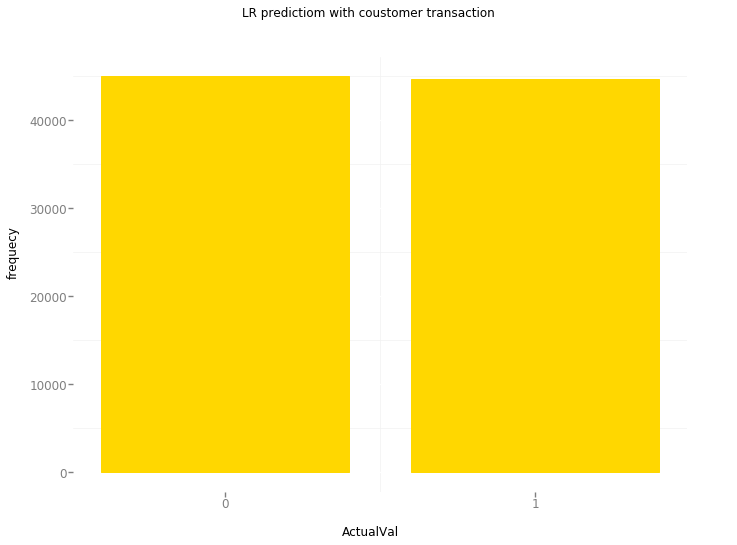

<ggplot: (-9223371895650614136)>

In [169]:
#plotting a barplot for count of fare amount values through week wise
ggplot(testLR, aes(x='ActualVal'))+\
    geom_bar(fill="Gold")+\
    scale_color_brewer(type='diverging', palette=2)+\
    xlab('ActualVal')+ylab('frequecy')+ggtitle("LR predictiom with coustomer transaction ")+ theme_bw()

In [45]:
#build confusion matrix
CML=pd.crosstab(testLR['target'], testLR['ActualVal'])

In [46]:
CML

ActualVal,0,1
target,,
0,44581,648
1,3647,1342


In [47]:
confusion_metrics(CML)

True Positives: 1342
True Negatives: 44581
False Positives: 3647
False Negatives: 648
--------------------------------------------------
Accuracy: 0.91
Mis-Classification: 0.09
FNR: 0.01
FPR: 0.73
Sensitivity/TPR: 0.67
Specificity/TNR: 0.92
Precision: 0.92
f_1 Score: 0.78


In [48]:
# AUC_ROC_SCORE
roc_auc_score(testLR['target'], testLR['ActualVal'])

0.6273323454472776

# Splitting the data

In [49]:
#import library for train_test_split function sklearn library
from sklearn.model_selection import train_test_split
#divide data into train and test
x=train.values[:,1:201]
y=train.values[:,0]
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.3)

# Decision tree model

In [50]:
#import the library decision tree
from sklearn import tree
#decision tree
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [51]:
#predict new test cases
DT_Predictions=clf.predict(x_test)

In [52]:
#Build confusion matrix
CMD = pd.crosstab(y_test, DT_Predictions)

In [53]:
#Error matrics
confusion_metrics(CMD)

True Positives: 1189
True Negatives: 49084
False Positives: 4884
False Negatives: 4843
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
FNR: 0.09
FPR: 0.8
Sensitivity/TPR: 0.2
Specificity/TNR: 0.91
Precision: 0.91
f_1 Score: 0.32


In [54]:
#AUROC SCORE
roc_auc_score(y_test, DT_Predictions)

0.552989015030232

# Naive Bayes Model

In [55]:
# library for Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)

In [56]:
#predict test cases with trained model
NB_Predictions = NB_model.predict(x_test)

In [57]:
#Build confusion matrix for Naive bayes predictions with actual test target class values
CMN = pd.crosstab(y_test, NB_Predictions)

In [58]:
confusion_metrics(CMN)

True Positives: 2192
True Negatives: 53016
False Positives: 3881
False Negatives: 911
--------------------------------------------------
Accuracy: 0.92
Mis-Classification: 0.08
FNR: 0.02
FPR: 0.64
Sensitivity/TPR: 0.71
Specificity/TNR: 0.93
Precision: 0.93
f_1 Score: 0.8


In [59]:
#AUROC SCORE 
roc_auc_score(y_test, NB_Predictions)

0.6720243331918743

# Random Forest Model

In [74]:
#importing library required for Random forest model
from sklearn.ensemble import RandomForestClassifier
#Build random forest model on train data
RF_model = RandomForestClassifier(n_estimators =15).fit(x_train, y_train)
# predict on new test cases
RF_Predictions = RF_model.predict(x_test)

In [75]:
#develop confusion matrix and calculate error
CMR=pd.crosstab(y_test, RF_Predictions)

In [76]:
CMR

col_0,0.0,1.0
row_0,,
0.0,53889,38
1.0,5995,78


In [77]:
#Error metrics for the model
confusion_metrics(CMR) 

True Positives: 78
True Negatives: 53889
False Positives: 5995
False Negatives: 38
--------------------------------------------------
Accuracy: 0.9
Mis-Classification: 0.1
FNR: 0.0
FPR: 0.99
Sensitivity/TPR: 0.67
Specificity/TNR: 0.9
Precision: 0.9
f_1 Score: 0.77


In [78]:
#AUROC SCORE of the model performance
roc_auc_score(y_test, RF_Predictions)

0.5060695391340992

In [79]:
#importing library for the error metrics to generate ROC curve
from sklearn import metrics

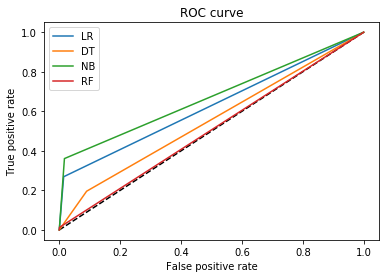

In [80]:
#define the values to plot the roc curve
fpr_lr, tpr_lr, _ = roc_curve(testLR['target'], testLR['ActualVal'])
fpr_dt, tpr_dt, _ = roc_curve(y_test, DT_Predictions)
fpr_nb, tpr_nb, _ = roc_curve(y_test, NB_Predictions)
fpr_rf, tpr_rf, _ = roc_curve(y_test, RF_Predictions)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_dt, tpr_dt, label='DT')
plt.plot(fpr_nb, tpr_nb, label='NB')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# santandar Random Under sampling

In [81]:
#loading both train and test data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [82]:
#loading train and test data
del train["ID_code"]
del test["ID_code"]

In [83]:
# target class counting
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
train_class_0 = train[train['target'] == 0]
train_class_1 = train[train['target'] == 1]

In [84]:
train_class_0.shape, train_class_1.shape

((179902, 201), (20098, 201))

Random under-sampling:
1    20098
0    20098
Name: target, dtype: int64


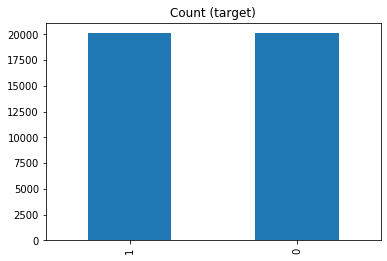

In [85]:
#Random under sampling
class_0_under = train_class_0.sample(count_class_1)
train_under = pd.concat([class_0_under, train_class_1], axis=0)

print('Random under-sampling:')
print(train_under.target.value_counts())

train_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [86]:
#divide data into train and test using simple random sampling
Sample_Index=np.random.rand(len(train_under))< 0.75
trainLR=train_under[Sample_Index]
testLR=train_under[~Sample_Index]

In [87]:
#select coulmn indexes for independent variables
train_cols=trainLR.columns[1:201]

# Logistic regression

In [88]:
#importing the logistic regresion model from stat models
import statsmodels.api as sm
#build logistic regression model
logit=sm.Logit(trainLR['target'], trainLR[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.464048
         Iterations 6


In [89]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                30079
Model:                          Logit   Df Residuals:                    29879
Method:                           MLE   Df Model:                          199
Date:                Tue, 10 Dec 2019   Pseudo R-squ.:                  0.3305
Time:                        19:10:32   Log-Likelihood:                -13958.
converged:                       True   LL-Null:                       -20849.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0494      0.005     10.421      0.000       0.040       0.059
var_1          0.0418      0.004     11.580      0.000       0.035       0.049
var_2          0.0599      0.005     11.010      0.000       0.049       0.071
var_3          0.0105      0.007      1.448      0.148      -0.004       0.025
var_4          0.0300      0.009      3.290      0.001       0.012       0.048
var_5          0.0135      0.002      7.223      0.000       0.010       0.017
var_6          0.2654      0.017     15.894      0.000       0.233       0.298
var_7         -0.0039      0.004     -0.886      0.376      -0.012       0.005
var_8          0.0159      0.004      3.574      0.000       0.007       0.025
var_9         -0.1165      0.012     -9.865      0.000      -0.140      -0.093
var_10        -0.0005      0.003     -0.175      0.861      -0.006       0.005
var_11         0.0115      0.002      4.661      0.000       0.007       0.016
var_12        -1.0264      0.075    -13.705      0.000      -1.173      -0.880
var_13        -0.0361      0.003    -11.484      0.000      -0.042      -0.030
var_14        -0.0003      0.007     -0.050      0.960      -0.013       0.013
var_15         0.1766      0.036      4.917      0.000       0.106       0.247
var_16         0.0054      0.006      0.940      0.347      -0.006       0.017
var_17         0.0008      0.002      0.380      0.704      -0.004       0.005
var_18         0.0181      0.002      9.718      0.000       0.014       0.022
var_19         0.0031      0.002      1.661      0.097      -0.001       0.007
var_20        -0.0122      0.003     -4.845      0.000      -0.017      -0.007
var_21        -0.0219      0.002    -12.253      0.000      -0.025      -0.018
var_22         0.0736      0.005     14.606      0.000       0.064       0.083
var_23        -0.1908      0.028     -6.786      0.000      -0.246      -0.136
var_24         0.0236      0.004      6.063      0.000       0.016       0.031
var_25         0.0889      0.052      1.717      0.086      -0.013       0.190
var_26         0.0322      0.002     13.271      0.000       0.027       0.037
var_27        -0.0108      0.010     -1.110      0.267      -0.030       0.008
var_28        -0.1189      0.019     -6.324      0.000      -0.156      -0.082
var_29         0.0040      0.006      0.712      0.477      -0.007       0.015
var_30         0.0004      0.002      0.235      0.815      -0.003       0.004
var_31        -0.0448      0.007     -6.525      0.000      -0.058      -0.031
var_32         0.0379      0.006      6.651      0.000       0.027       0.049
var_33        -0.0344      0.003    -10.092      0.000      -0.041      -0.028
var_34        -0.3472      0.027    -12.818      0.000      -0.400      -0.294
var_35         0.0184      0.003      6.462      0.000       0.013       0.024
var_36        -0.0439      0.005     -9.305      0.000      -0.053      -0.035
var_37         0.0144      0.007      2.195      0.028       0.002       0.027
va

In [90]:
#predict on test data
testLR['Actual_prob']=logit.predict(testLR[train_cols])

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
#converting predictions into probabilities
testLR['ActualVal']=1
testLR.loc[testLR.Actual_prob<0.5, 'ActualVal']=0

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yegav\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
#build confusion matrix
CML=pd.crosstab(testLR['target'], testLR['ActualVal'])

In [94]:
confusion_metrics(CML) 

True Positives: 3880
True Negatives: 3954
False Positives: 1151
False Negatives: 1132
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
FNR: 0.22
FPR: 0.23
Sensitivity/TPR: 0.77
Specificity/TNR: 0.77
Precision: 0.77
f_1 Score: 0.77


In [93]:
#AUROC SCORE calculation
roc_auc_score(testLR['target'], testLR['ActualVal'])

0.774323340002953

In [95]:
#import library for train_test_split function sklearn library
from sklearn.model_selection import train_test_split
#divide data into train and test
x=train_under.values[:,1:201]
y=train_under.values[:,0]
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.3)

# Decision tree Classifier

In [96]:
#importing model
from sklearn import tree
#decision tree training
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [97]:
#predict new test cases
DT_Predictions=clf.predict(x_test)

In [98]:
#Build confusion matrix
CMD = pd.crosstab(y_test, DT_Predictions)

In [99]:
#Error metrics on confusionmatrix
confusion_metrics (CMD)

True Positives: 3481
True Negatives: 3549
False Positives: 2595
False Negatives: 2434
--------------------------------------------------
Accuracy: 0.58
Mis-Classification: 0.42
FNR: 0.41
FPR: 0.43
Sensitivity/TPR: 0.59
Specificity/TNR: 0.58
Precision: 0.58
f_1 Score: 0.58


In [100]:
#AUROC SCORE CALCULATION
roc_auc_score(y_test, DT_Predictions)

0.5830452438371303

# Naive Bayes classifier

In [101]:
#importing gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Naive Bayes implementation on train data
NB_model = GaussianNB().fit(x_train, y_train)

In [102]:
#predicting on test cases
NB_Predictions = NB_model.predict(x_test)

In [103]:
#Build confusion matrix
CMN = pd.crosstab(y_test, NB_Predictions)

In [104]:
#Error metrics application
confusion_metrics (CMN)

True Positives: 4876
True Negatives: 4822
False Positives: 1200
False Negatives: 1161
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
FNR: 0.19
FPR: 0.2
Sensitivity/TPR: 0.81
Specificity/TNR: 0.8
Precision: 0.8
f_1 Score: 0.8


In [105]:
#AUROC score calculation
roc_auc_score(y_test, NB_Predictions)

0.8042259190154417

# Random  Forest Classfier

In [114]:
#importing Random Forest Classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50).fit(x_train, y_train)
# predict on test cases
RF_Predictions = RF_model.predict(x_test)

In [115]:
#develop confusion matrix and calculate error
CMR=pd.crosstab(y_test, RF_Predictions)

In [116]:
#applying errormetrics
confusion_metrics (CMR)

True Positives: 4301
True Negatives: 4363
False Positives: 1775
False Negatives: 1620
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
FNR: 0.27
FPR: 0.29
Sensitivity/TPR: 0.73
Specificity/TNR: 0.71
Precision: 0.71
f_1 Score: 0.72


In [117]:
#AUROC score calculation
roc_auc_score(y_test, RF_Predictions)

0.7185499220580761

# Santandar customer transactions predictions : Random oversampling 

In [118]:
#loding bith train test datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [119]:
#deleting ID_code variable from both test and train data
del train["ID_code"]
del test["ID_code"]

In [120]:
# target class counting
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
train_class_0 = train[train['target'] == 0]
train_class_1 = train[train['target'] == 1]

Random over-sampling:
1    179902
0    179902
Name: target, dtype: int64


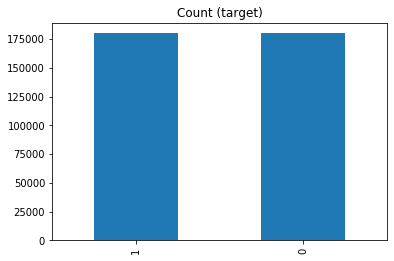

In [121]:
# Application of Random over sampling
class_1_over = train_class_1.sample(count_class_0, replace=True)
train_over = pd.concat([train_class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(train_over.target.value_counts())

train_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [122]:
cnames=list(train_over.columns)

In [123]:
cnames.remove('target')

In [124]:
#divide data into train and test using simple random sampling
Sample_Index=np.random.rand(len(train_over))< 0.75
trainLR=train_over[Sample_Index]
testLR=train_over[~Sample_Index]

In [125]:
#select coulmn indexes for independent variables
train_cols=trainLR.columns[1:201]

In [126]:
#building logistic regression model
import statsmodels.api as sm
logit=sm.Logit(trainLR['target'], trainLR[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.463249
         Iterations 6


In [127]:
#summary of logistic regression model
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               270109
Model:                          Logit   Df Residuals:                   269909
Method:                           MLE   Df Model:                          199
Date:                Tue, 10 Dec 2019   Pseudo R-squ.:                  0.3317
Time:                        19:26:55   Log-Likelihood:            -1.2513e+05
converged:                       True   LL-Null:                   -1.8723e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0539      0.002     34.172      0.000       0.051       0.057
var_1          0.0425      0.001     35.167      0.000       0.040       0.045
var_2          0.0641      0.002     35.147      0.000       0.061       0.068
var_3          0.0187      0.002      7.731      0.000       0.014       0.023
var_4          0.0198      0.003      6.529      0.000       0.014       0.026
var_5          0.0141      0.001     22.632      0.000       0.013       0.015
var_6          0.2575      0.006     46.011      0.000       0.247       0.268
var_7         -0.0036      0.001     -2.501      0.012      -0.006      -0.001
var_8          0.0177      0.001     11.930      0.000       0.015       0.021
var_9         -0.1084      0.004    -27.396      0.000      -0.116      -0.101
var_10        -0.0003      0.001     -0.306      0.760      -0.002       0.001
var_11         0.0115      0.001     14.048      0.000       0.010       0.013
var_12        -1.0621      0.025    -42.435      0.000      -1.111      -1.013
var_13        -0.0369      0.001    -35.211      0.000      -0.039      -0.035
var_14        -0.0009      0.002     -0.409      0.683      -0.005       0.003
var_15         0.1362      0.012     11.407      0.000       0.113       0.160
var_16         0.0059      0.002      3.083      0.002       0.002       0.010
var_17         0.0003      0.001      0.456      0.648      -0.001       0.002
var_18         0.0170      0.001     27.303      0.000       0.016       0.018
var_19         0.0042      0.001      6.832      0.000       0.003       0.005
var_20        -0.0118      0.001    -14.064      0.000      -0.013      -0.010
var_21        -0.0231      0.001    -39.027      0.000      -0.024      -0.022
var_22         0.0690      0.002     40.930      0.000       0.066       0.072
var_23        -0.1646      0.009    -17.580      0.000      -0.183      -0.146
var_24         0.0249      0.001     19.125      0.000       0.022       0.027
var_25         0.1690      0.017      9.815      0.000       0.135       0.203
var_26         0.0337      0.001     41.611      0.000       0.032       0.035
var_27         0.0001      0.003      0.034      0.973      -0.006       0.006
var_28        -0.1082      0.006    -17.275      0.000      -0.120      -0.096
var_29         0.0095      0.002      5.057      0.000       0.006       0.013
var_30         0.0003      0.001      0.446      0.656      -0.001       0.001
var_31        -0.0447      0.002    -19.411      0.000      -0.049      -0.040
var_32         0.0394      0.002     20.775      0.000       0.036       0.043
var_33        -0.0362      0.001    -31.961      0.000      -0.038      -0.034
var_34        -0.3156      0.009    -34.999      0.000      -0.333      -0.298
var_35         0.0212      0.001     22.478      0.000       0.019       0.023
var_36        -0.0439      0.002    -27.927      0.000      -0.047      -0.041
var_37         0.0100      0.002      4.539      0.000       0.006       0.014
va

In [128]:
#predict on test data
testLR['Actual_prob']=logit.predict(testLR[train_cols])

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
#converting probabilities into 0 and 1 classes
testLR['ActualVal']=1
testLR.loc[testLR.Actual_prob<0.5, 'ActualVal']=0

C:\Users\yegav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yegav\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [130]:
#building confusion matrix
CML=pd.crosstab(testLR['target'], testLR['ActualVal'])

In [131]:
confusion_metrics (CML)

True Positives: 34888
True Negatives: 35110
False Positives: 9871
False Negatives: 9826
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
FNR: 0.22
FPR: 0.22
Sensitivity/TPR: 0.78
Specificity/TNR: 0.78
Precision: 0.78
f_1 Score: 0.78


In [132]:
#auroc score calculation
roc_auc_score(testLR['target'], testLR['ActualVal'])

0.7803984000870479

In [133]:
#import library for train_test_split function sklearn library
from sklearn.model_selection import train_test_split
#divide data into train and test
x=train_over.values[:,1:201]
y=train_over.values[:,0]
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.3)

In [134]:
#importing decision tree from sklearn library
from sklearn import tree
#decision tree model building
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [135]:
#predict new test cases
DT_Predictions=clf.predict(x_test)

In [136]:
#Build confusion matrix
CMD = pd.crosstab(y_test, DT_Predictions)

In [137]:
#applying error metrics
confusion_metrics (CMD)

True Positives: 53986
True Negatives: 47025
False Positives: 107
False Negatives: 6824
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
FNR: 0.13
FPR: 0.0
Sensitivity/TPR: 0.89
Specificity/TNR: 1.0
Precision: 1.0
f_1 Score: 0.94


In [138]:
#AUROC SCORE
roc_auc_score(y_test, DT_Predictions)

0.935648597469317

In [139]:
#importing Gaussian Naive Bayes from sklearn library
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation on train data
NB_model = GaussianNB().fit(x_train, y_train)

In [140]:
#predicting the test cases with the train model
NB_Predictions = NB_model.predict(x_test)

In [141]:
#Build confusion matrix
CMN = pd.crosstab(y_test, NB_Predictions)

In [142]:
#Applying error metrics on Confusion matrix
confusion_metrics (CMN)

True Positives: 43513
True Negatives: 43758
False Positives: 10580
False Negatives: 10091
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
FNR: 0.19
FPR: 0.2
Sensitivity/TPR: 0.81
Specificity/TNR: 0.81
Precision: 0.81
f_1 Score: 0.81


In [143]:
#AUROC score calculation
roc_auc_score(y_test, NB_Predictions)

0.8085082706740041

In [144]:
#importing Random Forest Classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50).fit(x_train, y_train)
# predict on test cases
RF_Predictions = RF_model.predict(x_test)

In [145]:
#develop confusion matrix and calculate error
CMR=pd.crosstab(y_test, RF_Predictions)

In [146]:
#Application of error metrics on Confusion matrix
confusion_metrics (CMR)

True Positives: 53972
True Negatives: 53830
False Positives: 121
False Negatives: 19
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
FNR: 0.0
FPR: 0.0
Sensitivity/TPR: 1.0
Specificity/TNR: 1.0
Precision: 1.0
f_1 Score: 1.0


In [147]:
#AUROC score calculation
roc_auc_score(y_test, RF_Predictions)

0.9987051365926068

# santandar with SMOTE sampling

In [148]:
#Load the both test and train data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [149]:
#deleting the ID_code variable from both test and train data as it is nothing but code and no information
del train["ID_code"]
del test["ID_code"]

In [150]:
# defining a X and y values from train data and store 
X=train.values[:,1:201]
y=train.values[:,0]

In [151]:
# Splitting the X and y values into X_train, y_train , X_test and y_test values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140000, 200), (60000, 200), (140000,), (60000,))

In [152]:
#Checking the no of target classes
sum(y_train==1), sum(y_train==0)

(13984, 126016)

In [153]:
#Applying SMOTE oversampling method to increase the no's of minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [154]:
#Check the no of target class after oversampling
sum(y_train_res==1), sum(y_train_res==0)

(126016, 126016)

In [155]:
# Loading Decision tree classifier from sklearn library
from sklearn import tree
#Building decision tree model
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_res, y_train_res)

In [156]:
#predicting test cases with trained model
DT_Predictions=clf.predict(X_test)

In [157]:
#Building confusion matrix
CMD = pd.crosstab(y_test, DT_Predictions)

In [158]:
#Applying the error metrics on Confusion metrics 
confusion_metrics (CMD)

True Positives: 1904
True Negatives: 40424
False Positives: 4210
False Negatives: 13462
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
FNR: 0.25
FPR: 0.69
Sensitivity/TPR: 0.12
Specificity/TNR: 0.91
Precision: 0.91
f_1 Score: 0.22


In [159]:
#calculating AUROC score with roc_auc_score function from sklearn.metrics library
roc_auc_score(y_test, DT_Predictions)

0.5307963597194629

In [160]:
# Importing Gaussian Naive Bayes from from sklearn library
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation on the train data
NB_model = GaussianNB().fit(X_train_res, y_train_res)

In [161]:
#predicting the test cases with the trained model
NB_Predictions = NB_model.predict(X_test)

In [162]:
#Build confusion matrix between NB predictions and test case values
CMN = pd.crosstab(y_test, NB_Predictions)

In [163]:
#Applying error metrics on confusion matrix 
confusion_metrics (CMN)

True Positives: 532
True Negatives: 51590
False Positives: 5582
False Negatives: 2296
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
FNR: 0.04
FPR: 0.91
Sensitivity/TPR: 0.19
Specificity/TNR: 0.9
Precision: 0.9
f_1 Score: 0.31


In [164]:
#calculating AUROC score with roc_auc_score function from sklearn.metrics library
roc_auc_score(y_test, NB_Predictions)

0.5222024710546384

In [165]:
#importing random forest model from sklearn library
from sklearn.ensemble import RandomForestClassifier
#training on train  data
RF_model = RandomForestClassifier(n_estimators =50).fit(X_train, y_train)
# predicting test cases with trained model
RF_Predictions = RF_model.predict(X_test)

In [166]:
#develop confusion matrix and calculate error
CMR=pd.crosstab(y_test, RF_Predictions)

In [167]:
#Application of error metrics on Confusion matrix
confusion_metrics (CMR)

True Positives: 3
True Negatives: 53885
False Positives: 6111
False Negatives: 1
--------------------------------------------------
Accuracy: 0.9
Mis-Classification: 0.1
FNR: 0.0
FPR: 1.0
Sensitivity/TPR: 0.75
Specificity/TNR: 0.9
Precision: 0.9
f_1 Score: 0.82


In [168]:
roc_auc_score(y_test, RF_Predictions)

0.5002360597192845

# FInalizing the model for test data prediction¶

In [170]:
#loding bith train test datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [171]:
#deleting ID_code variable from both test and train data
del train["ID_code"]
del test["ID_code"]

In [172]:
# target class counting
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
train_class_0 = train[train['target'] == 0]
train_class_1 = train[train['target'] == 1]

Random over-sampling:
1    179902
0    179902
Name: target, dtype: int64


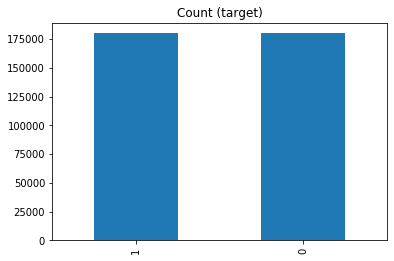

In [173]:
# Application of Random over sampling
class_1_over = train_class_1.sample(count_class_0, replace=True)
train_over = pd.concat([train_class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(train_over.target.value_counts())

train_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [178]:
train_over.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [180]:
#importing Random Forest Classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50).fit(train_over.iloc[:,1:201], train_over.iloc[:,0])

In [183]:
import pickle
pickle.dump(RF_model, open('model.pkl','wb'))

In [181]:
# predict on test cases
RF_Predictions = RF_model.predict(test)

In [185]:
#making the data frame with random forest predictions
pred=pd.DataFrame(RF_Predictions)

In [192]:
test=pd.read_csv("test.csv")

In [193]:
# concatinating the both predictions and test data with pd.concat function
test_data_pred_with_RF = pd.concat([test, pred], axis=1)

In [194]:
test_data_pred_with_RF.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,0
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.23

In [195]:
# renaming the predicted fareamount column name  as fare_amount_pred
test_data_pred_with_RF=test_data_pred_with_RF.rename(columns = { 0: 'precited_transaction'})

In [196]:
test_data_pred_with_RF.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,precited_transaction
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5

In [197]:
#saving the pradicted values in test dat into disc 
test_data_pred_with_RF.to_csv("predictions_RF.csv",index=False)

# Model Deployment

In [ ]:
model = pickle.load(open('model.pkl','rb'))